In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
import time
import scipy
from sklearn.decomposition import PCA
import random

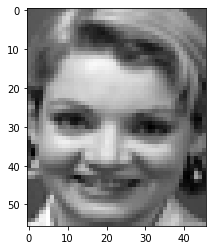

(56, 46)


In [2]:
"""
    2.Principal Component Analysis
"""
img = cv2.imread("./p2_data/1_1.png", cv2.IMREAD_GRAYSCALE)

# displaying image
#img = cv2.cvtColor(img, )
plt.imshow(img, cmap="gray")
plt.show()
print(img.shape)

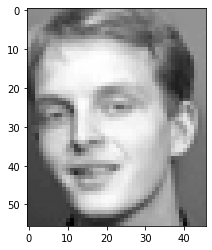

360 40


In [3]:
# Get Dataset
rows = 40
cols = 10
training = []
testing = []
for i in range(rows):
    for j in range(cols):
        img = cv2.imread("./p2_data/" + str(i + 1) + "_" + str(j + 1) + ".png", cv2.IMREAD_GRAYSCALE)
        if j == 9:
            testing.append(img)
        else:
            training.append(img)
        #plt.imshow(img)
        #plt.show()
plt.imshow(training[359], cmap="gray")
plt.show()
print(len(training), len(testing))

In [4]:
# sklearn PCA
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

training = np.array(training)
testing = np.array(testing)
print(training.shape)
# every data reshape to 1 by [row*col] and to float
x = training.reshape(360, 1, -1).astype(np.float64)
print(x.shape)

# calculate mean
u = np.mean(x, axis=0)
print(u.shape)

print(np.mean(u))
print(np.mean(x))

# every data - mean (now new mean is zero)
x -= u
C = np.zeros((2576, 2576))
print(x[0])
for element in x: # get x x.T to generate C
    C += np.dot(element.T, element)
    
C /= 360
print(C)
print(C.shape)

(360, 56, 46)
(360, 1, 2576)
(1, 2576)
112.62110507246378
112.62110507246376
[[ 2.46944444  2.325       4.13055556 ... 62.49444444 67.21944444
  59.75833333]]
[[1261.65462191 1256.04465278 1252.65815586 ...  -47.25989198
   -82.20857253  -32.30599537]
 [1256.04465278 1255.73048611 1252.74090278 ...  -49.02736111
   -83.31854167  -28.62979167]
 [1252.65815586 1252.74090278 1256.15239969 ...  -50.3728858
   -78.52309414  -21.81844907]
 ...
 [ -47.25989198  -49.02736111  -50.3728858  ... 1898.78330247
  1687.79427469 1499.32782407]
 [ -82.20857253  -83.31854167  -78.52309414 ... 1687.79427469
  1838.89906636 1705.9169213 ]
 [ -32.30599537  -28.62979167  -21.81844907 ... 1499.32782407
  1705.9169213  1787.26104167]]
(2576, 2576)


In [5]:
pca = PCA()
pca.fit(x.reshape(360, -1))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
# Singular values and eigenvalues relation
# https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
# 不使用 numpy.linalg.eig 因為順序會有問題
# https://stackoverflow.com/questions/56736928/numpy-why-does-np-linalg-eig-and-np-linalg-svd-give-different-v-values-of-svd
# 看來 numpy.linalg.svd 有負號問題
# https://stackoverflow.com/questions/36566844/pca-projection-and-reconstruction-in-scikit-learn

print(pca.components_[:5])
print(pca.explained_variance_[:5])

# using numpy SVD
U, S, VT = np.linalg.svd(x.reshape(360, -1) - x.reshape(360, -1).mean(0))
print(S.shape)
print(S[:5] ** 2 / 359)
print(VT[:5])

[[-0.00606884 -0.00622373 -0.00559664 ... -0.015444   -0.01280517
  -0.01320866]
 [-0.02919239 -0.0292641  -0.02943494 ...  0.01436437  0.01924303
   0.01866536]
 [ 0.04056566  0.04046655  0.04069564 ...  0.02404566  0.02869245
   0.03064081]
 [ 0.0213586   0.02137389  0.02155048 ... -0.03086069 -0.02643127
  -0.02550994]
 [-0.00666656 -0.00667572 -0.00634754 ...  0.01211183  0.01001324
   0.00815521]]
[719962.34802129 509479.59859037 272958.93795224 227026.28095642
 200889.52507632]
(360,)
[719962.34802129 509479.59859037 272958.93795224 227026.28095642
 200889.52507632]
[[-0.00606884 -0.00622373 -0.00559664 ... -0.015444   -0.01280517
  -0.01320866]
 [ 0.02919239  0.0292641   0.02943494 ... -0.01436437 -0.01924303
  -0.01866536]
 [ 0.04056566  0.04046655  0.04069564 ...  0.02404566  0.02869245
   0.03064081]
 [-0.0213586  -0.02137389 -0.02155048 ...  0.03086069  0.02643127
   0.02550994]
 [ 0.00666656  0.00667572  0.00634754 ... -0.01211183 -0.01001324
  -0.00815521]]


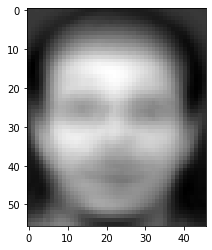

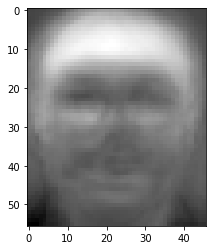

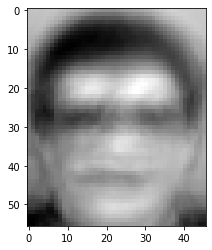

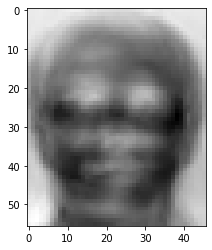

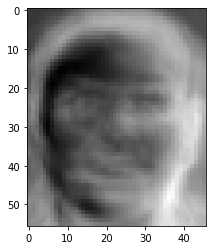

In [7]:
"""
    1).Perform PCA on the training set. Plot the mean face and the 
    first four eigenfaces.
"""
def myNormalize(A):
    minValue = np.min(A)
    maxValue = np.max(A)
    return (A - minValue ) / (maxValue - minValue)


plt.imshow(u.reshape(56, 46), cmap="gray")
plt.show()
for i in range(4):
    eigenFace = VT[i].reshape(56, 46)
    eigenFace = myNormalize(eigenFace)
    #print(eigenFace)
    plt.imshow(eigenFace, cmap="gray")
    plt.show()

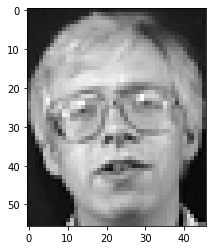

In [19]:
"""
    2). Take person2image1, and project it onto the PCA eigenspace you obtained above. 
    Reconstruct this image using the first n = 3, 50, 170, 240, 345 eigenfaces. 
    Plot the five reconstructed images.
"""
# w1.T (xi - u) = a1 w1.T w1 + a2 w1.T w2 + .... + an-1 w1.T wn-1
# = a1

# xi - u = sigma aiwi
# xi = aiwi + u
target = copy.deepcopy(x[9]) # 0~8 + 1 = 9
plt.imshow((target + u).reshape(56, 46), cmap="gray")
plt.show()


def myTransform(target, VT, num_eigenvector=360):
    a = []
    for i in range(num_eigenvector):
        colVector = VT[i].reshape(-1, 1)
        a.append(np.dot(target, colVector))
    return a

a = myTransform(target, VT)

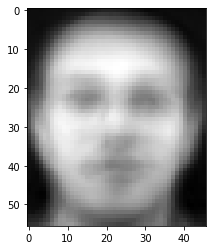

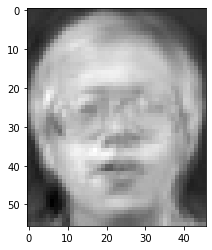

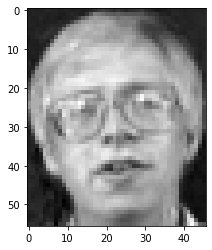

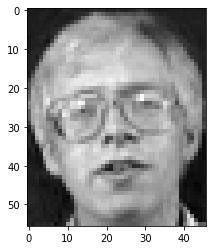

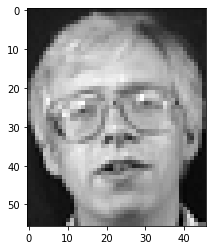

In [16]:
# xi - u = a1w1 + a2w2 + ...
n = [3, 50, 170, 240, 345]
reconstructImg = []
tempSum = np.zeros((1, 2576))
for i in range(360):
    tempSum += a[i] * VT[i]
    if i + 1 in n:
        localImg = (tempSum + u).reshape(56, 46)
        #print(localImg)
        #localImg = myNormalize(localImg)
        reconstructImg.append( localImg )
        plt.imshow(localImg, cmap="gray")
        plt.show()

In [17]:
"""
    3). above MSE with origin
"""
def MSE(A, B):
    return (np.square(A - B)).mean()

tempTarget = (target + u).reshape(56, 46)
print(tempTarget)
for reImg in reconstructImg:
    print(MSE(tempTarget, (reImg) ))
print("====")
print(MSE( (tempSum + u).reshape(56, 46), tempTarget) )

[[ 36.  37.  35. ...  35.  36.  35.]
 [ 36.  37.  38. ...  36.  37.  35.]
 [ 37.  37.  38. ...  37.  38.  37.]
 ...
 [ 41.  40.  39. ...  20.  28.  29.]
 [ 38.  39.  37. ...  71.  19.  25.]
 [ 36.  39.  39. ... 155.  91.  93.]]
746.7994084720322
236.55430882685184
46.71704972752616
13.366611255635268
0.21543397076006587
====
6.727660587097904e-27


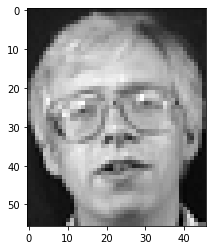

0.215433970760064


In [21]:
# Compare with sklearn result
localPca = PCA(345)
localPca.fit(training.reshape(360, -1))
tResult = localPca.transform(training.reshape(360, -1))
tImg = localPca.inverse_transform(tResult[9])
plt.imshow(tImg.reshape(56, 46), cmap="gray")
plt.show()
print(MSE(tImg.reshape(56, 46), tempTarget))

In [64]:
"""
    4). k-nearest neighbor for testing set, determine the best k and n values 
    by 3-fold cross-validation. k = {1, 3, 5}, n = {3, 50, 170}
    *compute the eigenfaces of the training set, and project face images from
    both the training and testing sets onto the same feature space with reduced dimension.

"""
from sklearn.neighbors import KNeighborsClassifier

training = np.array(training).reshape(360, -1)
testing = np.array(testing).reshape(40, -1)


def toFold(training, train_y, fold_num=3):
    fold_length = int( len(training) / fold_num )
    ans = []
    
    indexs = [i for i in range(len(training))]
    random.shuffle(indexs)
    for i in range(fold_num):
        train_index = indexs[0:i*fold_length] + indexs[(i+1)*fold_length : ]
        test_index = indexs[i*fold_length : (i+1)*fold_length]
        #print(train_index)
        ans.append((np.array(train_index), np.array(test_index)))
    return ans

ks = [1, 3, 5]
ns = [3, 50, 170]

# generate labels
train_y = []
for i in range(40):
    for j in range(9):
        train_y.append(i + 1)
train_y = np.array(train_y)
test_y = [i+1 for i in range(40)]

fold_num = 3
folds = toFold(training, train_y, fold_num)

for k in ks:
    for n in ns:
        knn = KNeighborsClassifier(n_neighbors=k)
        localPca = PCA(n)
        myScore = 0
        for train_index, valid_index in folds:
            X_train = training[train_index]
            y_train = train_y[train_index]
            X_valid = training[valid_index]
            y_valid = train_y[valid_index]
            
            X_train = localPca.fit_transform(X_train)
            X_valid = localPca.transform(X_valid)
            
            knn.fit(X_train, y_train)
            myScore += knn.score(X_valid, y_valid)
            
        print("=== k:%d n:%d ===" % (k, n))
        print(myScore / 3)
        #X_train = localPca.fit_transform(training)
        #X_valid = localPca.transform(testing)
        #knn.fit(X_train, train_y)
        #print(knn.score(X_valid, test_y))




=== k:1 n:3 ===
0.6527777777777778
=== k:1 n:50 ===
0.9416666666666668
=== k:1 n:170 ===
0.9472222222222223
=== k:3 n:3 ===
0.5777777777777778
=== k:3 n:50 ===
0.8861111111111111
=== k:3 n:170 ===
0.8694444444444445
=== k:5 n:3 ===
0.48333333333333334
=== k:5 n:50 ===
0.8111111111111112
=== k:5 n:170 ===
0.7972222222222222


In [66]:
"""
    5). Use your hyperparameter choice in 4. and report the recognition 
    rate of the testing set.
"""
knn = KNeighborsClassifier(n_neighbors=1)
localPca = PCA(170)
train_x_trans = localPca.fit_transform(training)
test_x_trans = localPca.transform(testing)

knn.fit(train_x_trans, train_y)
print("=== k:%d n:%d ===" % (k, n))
print(knn.score(test_x_trans, test_y))



=== k:5 n:170 ===
0.95
